# Encoding
- Variables categóricas

In [42]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_asunciones as sa
from src import soporte_preprocesamiento as sp
from src import soporte_encoding as se

- Importamos el dataframe generado en el notebook anterior.

In [43]:
df = pd.read_csv("../../datos/modelo1/csv_sin_nulos.csv", index_col=0)

In [44]:
df.dtypes

price           float64
propertyType     object
size            float64
exterior           bool
rooms             int64
bathrooms         int64
municipality     object
distance          int64
floor            object
hasLift          object
dtype: object

In [45]:
df[["rooms", "bathrooms", "exterior"]] = df[["rooms", "bathrooms", "exterior"]].astype(str)

- En total, tenemos 7 variables respuesta categóricas, dado que, entendemos que la cantidad de baños y habitaciones son una características con un número limitado de valores únicos (menos de 3 baños y 6 habitaciones), lo que quiere decir son discretas, siendo más una etiqueta que un valor matemático continuo y cambiante. 

In [31]:
lista_col_categ = df.select_dtypes(include="O").columns.tolist()
lista_col_categ

['propertyType',
 'exterior',
 'rooms',
 'bathrooms',
 'municipality',
 'floor',
 'hasLift']

Con un barplot, somos capaces de visualizar la relación entre la variable respuesta (price) y el resto de las variables categóricas.

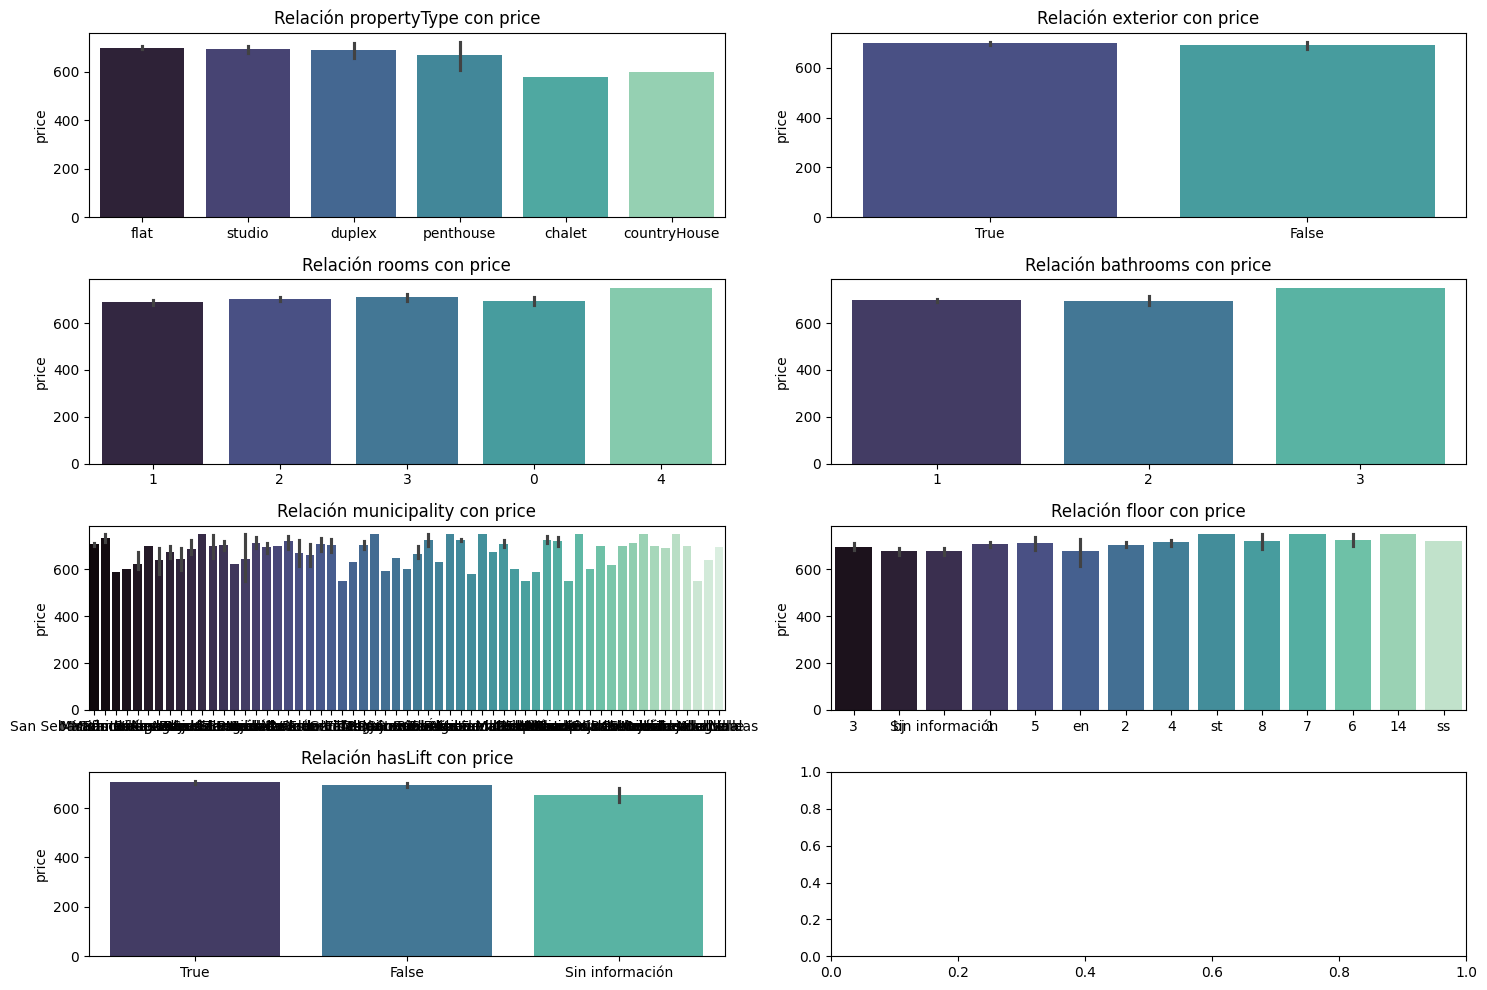

In [46]:
sa.visualizar_categorias(df, lista_col_categ, "price", tipo_grafica="barplot")

### Diferencias entre categorías y orden
- El siguiente paso será comprobar la normalidad y homocedasticidad, con el fin de identificar si son o no paramétricas, y comprobar diferencias.

- Para evaluar si hay diferencias entre las categorías de nuestras variables predictoras categóricas y dónde se encuentran, utilizaremos los tests de Mann-Whitney (VR con 2 categorías) y Kruskal (VR con más de categorías).

In [8]:
# instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = sa.Asunciones(dataframe = df, columna_numerica = "price")
print("\n-------------\n")

for categoria in lista_col_categ:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    # comprobamos la normalidad
    asunciones.identificar_normalidad(metodo = "k") 

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = se.TestEstadisticos(df, "price", categoria)
    test.run_all_tests()
    print("\n-------------\n")


-------------

Estamos analizando la variable PROPERTYTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable propertyType las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['flat', 'studio', 'duplex', 'penthouse', 'chalet', 'countryHouse']

Realizando test de K...
Estadístico de prueba: 5.700888481044448
Valor p: 0.33641999794605465
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



-------------

Estamos analizando la variable EXTERIOR
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable exterior las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['True', 'False']

Realizando test de M...
Estadístico del Test de Mann-Whitney U: 9420.0
Valor p: 0.3438528186116434
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



-------------

Estamos analizando la variable ROOMS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable rooms las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['1', '2', '3', '0', '4']

Realizando test de K...
Estadístico de prueba: 9.10144401613271
Valor p: 0.05861327939556589
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



-------------

Estamos analizando la variable BATHROOMS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable bathrooms las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['1', '2', '3']

Realizando test de K...
Estadístico de prueba: 1.807107041211833
Valor p: 0.40512747002002014
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



-------------

Estamos analizando la variable MUNICIPALITY
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable municipality las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Madrid', 'San Sebastián de los Reyes', 'Rascafría', 'Manzanares el Real', 'Miraflores de la Sierra', 'Galapagar', 'Arganda', 'San Lorenzo de el Escorial', 'Aranjuez', 'Villanueva del Pardillo', 'Las Rozas de Madrid', 'Navalcarnero', 'Alcalá de Henares', 'El Escorial', 'Leganés', 'Coslada', 'Torrejón de Ardoz', 'Camarma de Esteruelas', 'Alcorcón', 'Pinto', 'Valdemoro', 'Collado Villalba', 'Getafe', 'Paracuellos de Jarama', 'El Molar', 'Parla', 'Tres Cantos', 'Quijorna', 'Pedrezuela', 'Daganzo de Arriba', 'Guadarrama', 'Cobeña', 'El Álamo', 'Algete', 'Rivas-Vaciamadrid', 'Los Santos de la Humosa', 'San Fernando de Henares', 'Aldea del Fresno', 'Fuenlabrada', 'Mataelpino', 'Villa del Prado', 'Los Molinos', 'Colmenar Vi

,meandiff,p-adj,lower,upper,group_diff



-------------

Estamos analizando la variable FLOOR
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable floor las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['3', 'bj', 'Sin información', '1', '5', 'en', '2', '4', 'st', '8', '7', '6', '14', 'ss']

Realizando test de K...
Estadístico de prueba: 30.455238722567398
Valor p: 0.004047398285759242
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



-------------

Estamos analizando la variable HASLIFT
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable hasLift las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['True', 'False', 'Sin información']

Realizando test de K...
Estadístico de prueba: 10.530952330337138
Valor p: 0.005166932129361283
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-41.7699,0.0100,-75.3095,-8.2303,False-Sin información
2,50.9146,0.0011,17.5138,84.3155,Sin información-True



-------------



In [47]:
visual_encoding = sa.Analisis_Visual_Encoding(df, lista_col_categ, "price")

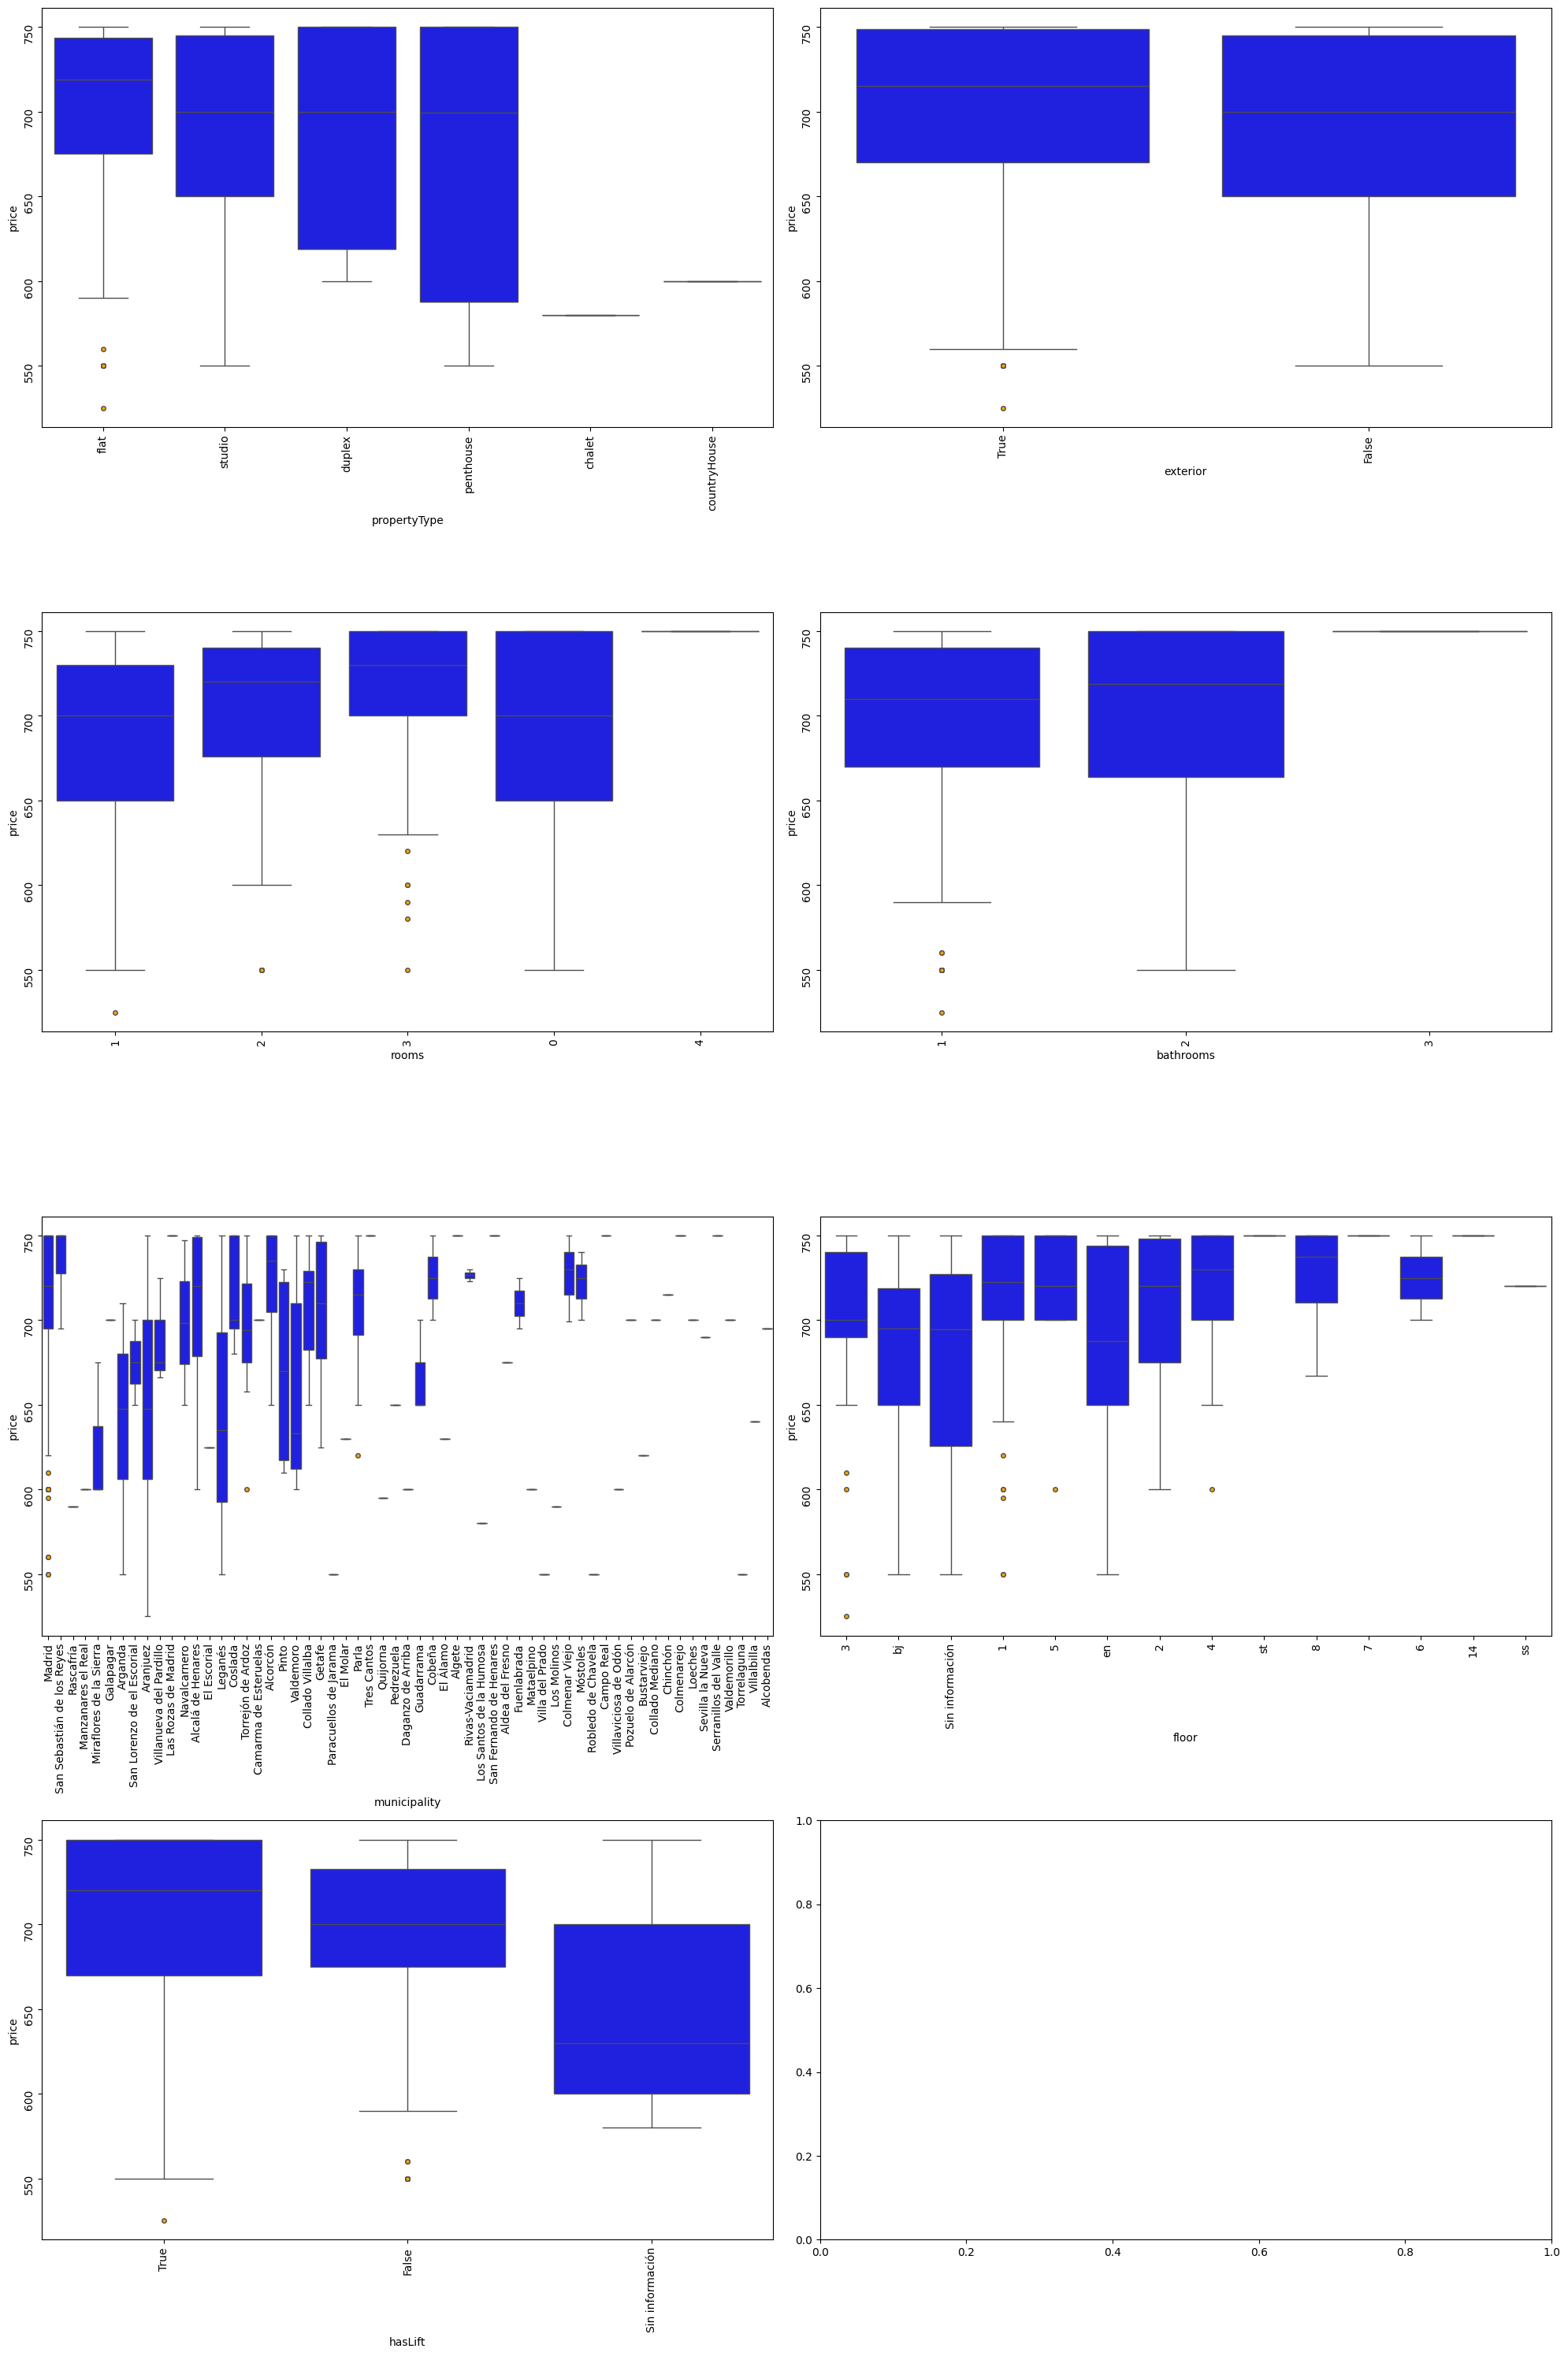

In [48]:
visual_encoding.crear_boxplot(tamano_grafica=(20, 30))

- Con ayuda de los tests y las visualizaciones, hemos identificado que existen diferencias significativas para las variables municipality, floor y hasLift, por sus p-valores <0,05.

In [49]:
df["floor"].unique()

array(['3', 'bj', 'Sin información', '1', '5', 'en', '2', '4', 'st', '8',
       '7', '6', '14', 'ss'], dtype=object)

### Tabla resumen de p-valores y métodos de encoding

| Variable Predictora | p-valor | Método Encoding |
|------------------|--------|------------------------|
| `municipality`   |0.00        | Target                 | 
| `propertyType`   |0.06        | OneHot                 | 
| `floor`          |0.00        | Target                | 
| `hasLift`        |0.00        | Target                | 
| `rooms`          |0.14        | OneHot                | 
| `bathrooms`      |0.33        | OneHot                  | 
| `exterior`       |0.18        | OneHot                  | 

- Así, para las no ordenadas usaremos OneHotEncoding (es la única que tenemos en sklearn), y para las ordenadas el TargetEncoder, por cuanto utiliza la variable respuesta para asignar pesos. 

In [50]:
diccionario_encoding = {
    "onehot": ["propertyType", "rooms", "bathrooms", "exterior"],
    "dummies": [],
    "ordinal": {},
    "label": [],
    "frequency": [],
    "target": ["municipality", "floor", "hasLift"]
}

In [51]:
encoding = se.Encoding(df, diccionario_encoding, "price")

- Aplicamos primero OneHot.

In [52]:
oh_enc = encoding.one_hot_encoding()
oh_enc.head()

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3,exterior_False,exterior_True
0,750.0,flat,60.0,True,1,1,Madrid,7037,3,True,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,750.0,flat,70.0,True,2,1,San Sebastián de los Reyes,16145,bj,False,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,590.0,flat,70.0,True,3,2,Rascafría,56596,Sin información,False,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,684.0,studio,45.0,True,0,1,Madrid,10656,Sin información,Sin información,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,600.0,flat,73.0,True,2,1,Manzanares el Real,37062,3,False,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


- Comprobamos las columas resultantes (sabemos que se genera una nueva columna por cada categoría, asignando 1 y 0 según su aparición.)

In [53]:
oh_enc.columns

Index(['price', 'propertyType', 'size', 'exterior', 'rooms', 'bathrooms',
       'municipality', 'distance', 'floor', 'hasLift', 'propertyType_chalet',
       'propertyType_countryHouse', 'propertyType_duplex', 'propertyType_flat',
       'propertyType_penthouse', 'propertyType_studio', 'rooms_0', 'rooms_1',
       'rooms_2', 'rooms_3', 'rooms_4', 'bathrooms_1', 'bathrooms_2',
       'bathrooms_3', 'exterior_False', 'exterior_True'],
      dtype='object')

- Y aplicamos ahora el Target.

In [54]:
ta_enc = encoding.target_encoding()
ta_enc.head()

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3,exterior_False,exterior_True
0,750.0,flat,60.0,True,1,1,706.857143,7037,698.088889,703.847953,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,750.0,flat,70.0,True,2,1,735.576450,16145,678.344828,694.703226,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,590.0,flat,70.0,True,3,2,643.725806,56596,678.568966,694.703226,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,684.0,studio,45.0,True,0,1,706.857143,10656,678.568966,652.933370,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,600.0,flat,73.0,True,2,1,648.725806,37062,698.088889,694.703226,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


- Creamos un DF concatenado con las columnas con encoding que nos interesan de cada DF, manteniendo además price, size y distance, sobre las que no aplicamos ninguna operación por ser respectivamente la variable objetivo y numéricas.

In [55]:
df_encoded = pd.concat([oh_enc[['price', 'size', 'distance', 'propertyType_chalet',
       'propertyType_countryHouse', 'propertyType_duplex', 'propertyType_flat',
       'propertyType_penthouse', 'propertyType_studio', 'rooms_0', 'rooms_1',
       'rooms_2', 'rooms_3', 'rooms_4', 'bathrooms_1', 'bathrooms_2',
       'bathrooms_3', 'exterior_False', 'exterior_True']], ta_enc[["municipality", "floor", "hasLift"]]], axis=1)

df_encoded

,price,size,distance,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3,exterior_False,exterior_True,municipality,floor,hasLift
0,750.0,60.0,7037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,706.857143,698.088889,703.847953
1,750.0,70.0,16145,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,735.576450,678.344828,694.703226
2,590.0,70.0,56596,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,643.725806,678.568966,694.703226
3,684.0,45.0,10656,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,706.857143,678.568966,652.933370
4,600.0,73.0,37062,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,648.725806,698.088889,694.703226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,640.0,69.0,29311,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,668.725806,705.759259,703.847953
337,700.0,54.0,11656,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,704.999069,708.426471,703.847953
338,700.0,59.0,7529,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,706.857143,717.591098,703.847953
339,700.0,75.0,30359,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,705.090909,708.426471,694.703226


- Guardamos el DF que pasará al paso #3 del preprocesamiento, donde realizaremos la gestión de outliers para las variables numéricas.

In [56]:
df_encoded.to_csv("../../datos/modelo1/csv_encoded.csv")